# 1. Import and Install Dependencies

In [1]:
import mediapipe as mp

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time


# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):

    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections test
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Thiết lập mô hình Mediapipe 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Đọc hình ảnh từ camera
        ret, frame = cap.read()

        # Thực hiện phát hiện và theo dõi dự đoán
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Vẽ các điểm mốc
        draw_styled_landmarks(image, results)

        # Hiển thị trên màn hình
        cv2.imshow('Dữ liệu từ OpenCV', image)

        # Dừng chương trình một cách đẹp
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

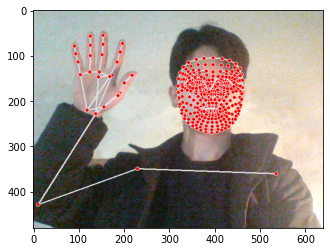

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
#len(results.right_hand_landmarks.landmark)

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.60776061,  0.37607139, -0.96960056, ...,  0.14320107,
        0.16551152, -0.05216914])

In [15]:
np.save('0', result_test)

In [16]:
np.load('0.npy')

array([ 0.60776061,  0.37607139, -0.96960056, ...,  0.14320107,
        0.16551152, -0.05216914])

# 4. Setup Folders for Collection

In [18]:
# Đường dẫn cho thư mục dữ liệu gốc
DATA_PATH = 'Data'

# Các hành động mà chúng ta muốn phát hiện
actions = np.array(['sory'])

# Số lượng dãy video
no_sequences = 30

# Mỗi video sẽ có 30 khung hình
sequence_length = 30

# Thư mục bắt đầu
start_folder = 1

try:
    # Tạo thư mục gốc "MP_Data" nếu chưa tồn tại
    os.makedirs(DATA_PATH)
except:
    pass

for action in actions: 
    # Tạo thư mục cho mỗi hành động nếu chưa tồn tại
    action_path = os.path.join(DATA_PATH, action)
    try:
        os.makedirs(action_path)
    except:
        pass

    # Tìm số lớn nhất trong danh sách các thư mục con của hành động
    existing_sequences = os.listdir(action_path)
    if len(existing_sequences) > 0:
        dirmax = np.max(np.array(existing_sequences).astype(int))
    else:
        dirmax = 0

    for sequence in range(1, no_sequences + 1):
        # Tạo thư mục con theo yêu cầu
        try: 
            os.makedirs(os.path.join(action_path, str(dirmax + sequence)))
        except:
            pass
print("đã tạo")

đã tạo


# 5. Collect Keypoint Values for Training and Testing

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [20]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'sory': 0}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(30, 30, 1662)

In [26]:

np.array(labels).shape

(30,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(30, 30, 1662)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [31]:
y_test.shape

(2, 1)

# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 [==============================] - 14s 14s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 2/2000
1/1 [==============================] - 0s 321ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3/2000
1/1 [==============================] - 0s 272ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4/2000
1/1 [==============================] - 0s 278ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 5/2000
1/1 [==============================] - 0s 268ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 6/2000
1/1 [==============================] - 0s 279ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 7/2000
1/1 [==============================] - 0s 257ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 8/2000
1/1 [==============================] - 0s 320ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 9/2000
1/1 [==============================] - 0s 258ms/step - loss:

1/1 [==============================] - 1s 753ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 72/2000
1/1 [==============================] - 1s 662ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 73/2000
1/1 [==============================] - 1s 626ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 74/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 75/2000
1/1 [==============================] - 1s 600ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 76/2000
1/1 [==============================] - 1s 908ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 77/2000
1/1 [==============================] - 1s 855ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 78/2000
1/1 [==============================] - 1s 847ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 79/2000
1/1 [==============================] - 1s 801ms/step - loss: 0.0000

1/1 [==============================] - 1s 551ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 142/2000
1/1 [==============================] - 1s 501ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 143/2000
1/1 [==============================] - 1s 985ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 144/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 145/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 146/2000
1/1 [==============================] - 1s 954ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 147/2000
1/1 [==============================] - 1s 852ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 148/2000
1/1 [==============================] - 1s 766ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 149/2000
1/1 [==============================] - 2s 2s/step - loss: 0.00

1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 211/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 212/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 213/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 214/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 215/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 216/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 217/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 218/2000
1/1 [==============================] - 0s 136ms/step - l

1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 280/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 281/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 282/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 283/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 284/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 285/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 286/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 287/2000
1/1 [==============================] - 0s 136ms/step - l

1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 349/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 350/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 351/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 352/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 353/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 354/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 355/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 356/2000
1/1 [==============================] - 0s 137ms/step - l

1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 418/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 419/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 420/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 421/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 422/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 423/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 424/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 425/2000
1/1 [==============================] - 0s 136ms/step - l

1/1 [==============================] - 0s 133ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 487/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 488/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 489/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 490/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 491/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 492/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 493/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 494/2000
1/1 [==============================] - 0s 139ms/step - l

1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 556/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 557/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 558/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 559/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 560/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 561/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 562/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 563/2000
1/1 [==============================] - 0s 137ms/step - l

1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 625/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 626/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 627/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 628/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 629/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 630/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 631/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 632/2000
1/1 [==============================] - 0s 142ms/step - l

1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 694/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 695/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 696/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 697/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 698/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 699/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 700/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 701/2000
1/1 [==============================] - 0s 147ms/step - l

1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 763/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 764/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 765/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 766/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 767/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 768/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 769/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 770/2000
1/1 [==============================] - 0s 138ms/step - l

1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 832/2000
1/1 [==============================] - 0s 146ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 833/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 834/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 835/2000
1/1 [==============================] - 0s 152ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 836/2000
1/1 [==============================] - 0s 149ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 837/2000
1/1 [==============================] - 0s 146ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 838/2000
1/1 [==============================] - 0s 150ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 839/2000
1/1 [==============================] - 0s 144ms/step - l

1/1 [==============================] - 0s 123ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 901/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 902/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 903/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 904/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 905/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 906/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 907/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 908/2000
1/1 [==============================] - 0s 127ms/step - l

1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 970/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 971/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 972/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 973/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 974/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 975/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 976/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 977/2000
1/1 [==============================] - 0s 141ms/step - l

1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1039/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1040/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1041/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1042/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1043/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1044/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1045/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1046/2000
1/1 [==============================] - 0s 143ms/

Epoch 1107/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1108/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1109/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1110/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1111/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1112/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1113/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1114/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1115/2000
1/1 [===========================

1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1176/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1177/2000
1/1 [==============================] - 0s 147ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1178/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1179/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1180/2000
1/1 [==============================] - 0s 151ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1181/2000
1/1 [==============================] - 0s 125ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1182/2000
1/1 [==============================] - 0s 126ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1183/2000
1/1 [==============================] - 0s 136ms/

Epoch 1244/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1245/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1246/2000
1/1 [==============================] - 0s 132ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1247/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1248/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1249/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1250/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1251/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1252/2000
1/1 [===========================

1/1 [==============================] - 0s 129ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1313/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1314/2000
1/1 [==============================] - 0s 129ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1315/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1316/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1317/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1318/2000
1/1 [==============================] - 0s 148ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1319/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1320/2000
1/1 [==============================] - 0s 146ms/

Epoch 1381/2000
1/1 [==============================] - 0s 161ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1382/2000
1/1 [==============================] - 0s 155ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1383/2000
1/1 [==============================] - 0s 165ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1384/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1385/2000
1/1 [==============================] - 0s 159ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1386/2000
1/1 [==============================] - 0s 149ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1387/2000
1/1 [==============================] - 0s 160ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1388/2000
1/1 [==============================] - 0s 185ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1389/2000
1/1 [===========================

1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1450/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1451/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1452/2000
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1453/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1454/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1455/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1456/2000
1/1 [==============================] - 0s 173ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1457/2000
1/1 [==============================] - 0s 170ms/

Epoch 1518/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1519/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1520/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1521/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1522/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1523/2000
1/1 [==============================] - 0s 150ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1524/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1525/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1526/2000
1/1 [===========================

1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1587/2000
1/1 [==============================] - 0s 127ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1588/2000
1/1 [==============================] - 0s 121ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1589/2000
1/1 [==============================] - 0s 133ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1590/2000
1/1 [==============================] - 0s 152ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1591/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1592/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1593/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1594/2000
1/1 [==============================] - 0s 151ms/

Epoch 1655/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1656/2000
1/1 [==============================] - 0s 124ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1657/2000
1/1 [==============================] - 0s 151ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1658/2000
1/1 [==============================] - 0s 124ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1659/2000
1/1 [==============================] - 0s 146ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1660/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1661/2000
1/1 [==============================] - 0s 124ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1662/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1663/2000
1/1 [===========================

1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1724/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1725/2000
1/1 [==============================] - 0s 148ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1726/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1727/2000
1/1 [==============================] - 0s 147ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1728/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1729/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1730/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1731/2000
1/1 [==============================] - 0s 140ms/

Epoch 1792/2000
1/1 [==============================] - 0s 123ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1793/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1794/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1795/2000
1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1796/2000
1/1 [==============================] - 0s 147ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1797/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1798/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1799/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1800/2000
1/1 [===========================

1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1861/2000
1/1 [==============================] - 0s 123ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1862/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1863/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1864/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1865/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1866/2000
1/1 [==============================] - 0s 134ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1867/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1868/2000
1/1 [==============================] - 0s 137ms/

Epoch 1929/2000
1/1 [==============================] - 0s 123ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1930/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1931/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1932/2000
1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1933/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1934/2000
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1935/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1936/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1937/2000
1/1 [===========================

1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1998/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1999/2000
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 2000/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 596,609
Trainable params: 596,609
Non-trai

# 8. Make Predictions

In [38]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [39]:
actions[np.argmax(res[4])]

IndexError: index 4 is out of bounds for axis 0 with size 2

In [40]:
actions[np.argmax(y_test[4])]

IndexError: index 4 is out of bounds for axis 0 with size 2

# 9. Save Weights

In [41]:
model.save('action.h5')
print("lưu thành công")

lưu thành công


In [42]:
del model

In [43]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

In [44]:
from tensorflow.keras.models import load_model
model = load_model('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 0],
        [0, 2]]], dtype=int64)

In [49]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [50]:
from scipy import stats

In [51]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [52]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 1296x1296 with 0 Axes>

In [54]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 44ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 67ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 48ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 71ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 34ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 40ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 70ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 68ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 71ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
sory
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
sory
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
sory
<class 'mediapipe.python.soluti